In [8]:
import numpy as np
import scipy.io as sio
import os
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import utils

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

In [9]:
TRAIN = '../data/dataset/train'
TEST = '../data/dataset/test'

In [11]:
# Carregar treino e teste
X_train, y_train = utils.load_dataset(TRAIN)
X_test, y_test = utils.load_dataset(TEST)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Lendo fall: 100%|██████████| 72/72 [00:00<00:00, 2569.14it/s]


In [12]:
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 6],
            'learning_rate': [0.1, 0.01]
        }
    }
}

In [13]:
best_models = {}

for name, mp in models.items():
    print(f"Training Model: {name}")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    clf.fit(X_train, y_train)
    best_models[name] = clf
    print(f"Best score: {clf.best_score_:.4f} with {clf.best_params_}")

Training Model: RandomForest
Best score: 0.9861 with {'max_depth': None, 'n_estimators': 200}
Training Model: XGBoost
Best score: 0.9861 with {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}



Results for: RandomForest
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.90      0.95        72

    accuracy                           0.95       144
   macro avg       0.96      0.95      0.95       144
weighted avg       0.96      0.95      0.95       144



/home/satan/miniconda3/envs/pattern-recognition/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


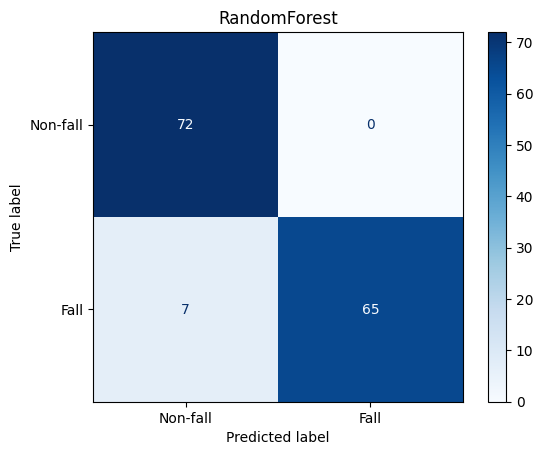


Results for: XGBoost
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        72
           1       1.00      0.88      0.93        72

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144
weighted avg       0.94      0.94      0.94       144



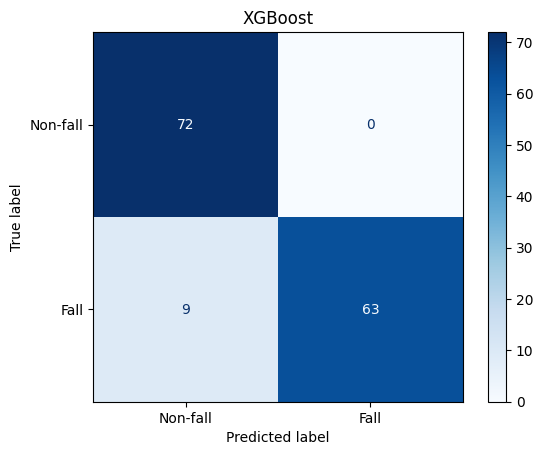

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for name, clf in best_models.items():
    print(f"\nResults for: {name}")
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Non-fall", "Fall"], cmap="Blues")
    plt.title(name)
    plt.show()



Results for: RandomForest
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.90      0.95        72

    accuracy                           0.95       144
   macro avg       0.96      0.95      0.95       144
weighted avg       0.96      0.95      0.95       144



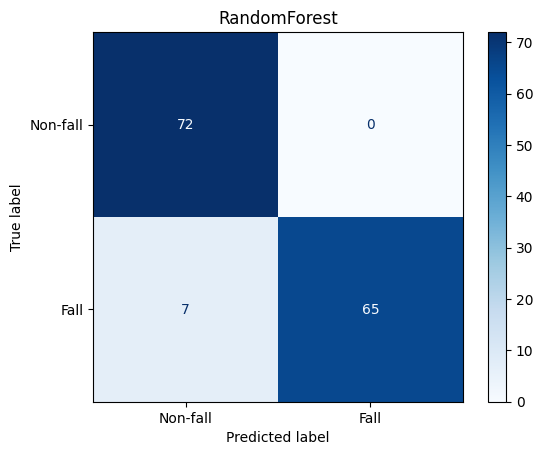


Results for: XGBoost
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        72
           1       1.00      0.88      0.93        72

    accuracy                           0.94       144
   macro avg       0.94      0.94      0.94       144
weighted avg       0.94      0.94      0.94       144



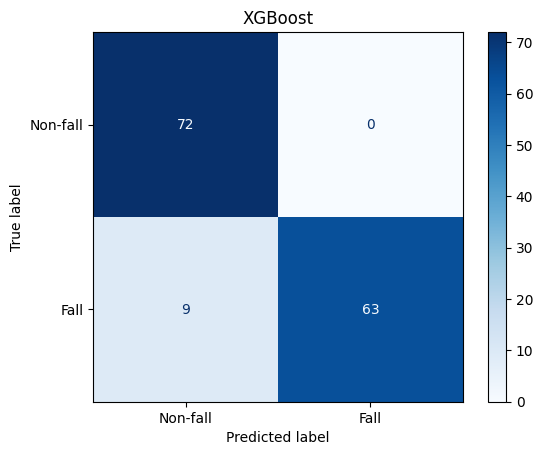

In [15]:
# Evaluate on test set
for name, clf in best_models.items():
    print(f"\nResults for: {name}")
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=["Non-fall", "Fall"], cmap="Blues")
    plt.title(name)
    plt.show()
